# Fetch Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
train = pd.read_csv("C:/Users/Sourabh/Downloads/training_set.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drop unnecessary Columns

In [4]:
for i in train.columns:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

In [5]:
train = train.drop("Id",axis=1)

# Find and replace Missing Data

In [6]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [7]:
from PM8 import replacer
replacer(train)

In [8]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Define X and Y

In [9]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
Y = train[["SalePrice"]]
X = train.drop("SalePrice",axis=1)

# Seperate cat and con

In [11]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Univariate

In [12]:
import numpy as np

In [13]:
X.skew().sort_values() > 0.7

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [14]:
cols_with_skew = ["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage","MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [15]:
cols_with_skew

['2ndFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'LotFrontage',
 'MasVnrArea',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'PoolArea',
 'MiscVal']

# Bivariate

<AxesSubplot:>

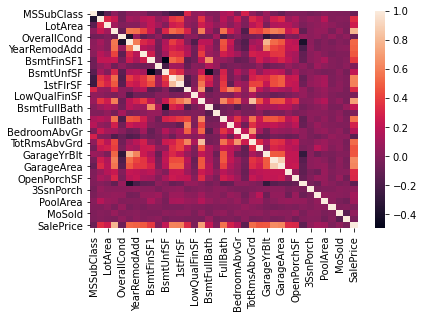

In [16]:
import seaborn as sb
sb.heatmap(train.corr())

In [17]:
imp_cols = list(train.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

<AxesSubplot:>

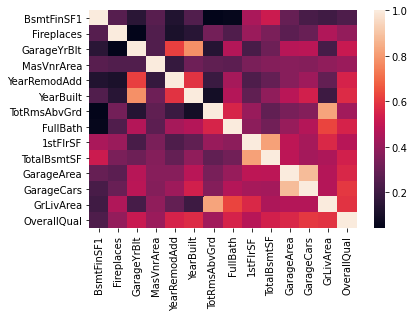

In [18]:
sb.heatmap(X[imp_cols].corr())

# Data Preparation

In [19]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X = X1.join(X2)

# OLS model

In [20]:
X = X.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual', 'YearRemodAdd', 'MasVnrArea'],axis=1)

In [21]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     66.80
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:11:27   Log-Likelihood:                -16613.
No. Observations:                1460   AIC:                         3.371e+04
Df Residuals:                    1220   BIC:                         3.497e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2177.3353   3244.610      0.671      0.502   -4188.300    8542.970
MSSubClass            -2657.4762   3565.739     -0.745      0.456   -9653.136    4338.184
LotFrontage             987.4959    986.719      1.001      0.317    -948.358    2923.350
LotArea                7234.7087   1109.012      6.524      0.000    5058.926    9410.491
OverallCond            7633.6276    920.842      8.290      0.000    5827.019    9440.237
YearBuilt              1.127e+04   2320.954      4.857      0.000    6718.903    1.58e+04
BsmtFinSF2            -1461.6650   1296.848     -1.127      0.260   -4005.966    1082.635
BsmtUnfSF             -7943.2133   1391.572     -5.708      0.000   -1.07e+04   -5213.074
TotalBsmtSF            1.574e+04   2070.669      7.601      0.000    1.17e+04    1.98e+04
1stFlrSF               2.096e+04   2049.851     10.226      0.000    1.69e+04     2.5e+04
2ndFlrSF               2.977e+04   2503.649     11.890      0.000    2.49e+04    3.47e+04
LowQualFinSF             98.9202    930.407      0.106      0.915   -1726.454    1924.295
BsmtFullBath            235.7716   1042.016      0.226      0.821   -1808.570    2280.113
BsmtHalfBath           -267.1061    737.002     -0.362      0.717   -1713.038    1178.826
FullBath               2323.2609   1236.962      1.878      0.061    -103.548    4750.070
HalfBath               1106.4982   1072.133      1.032      0.302    -996.930    3209.926
BedroomAbvGr          -3139.7259   1134.159     -2.768      0.006   -5364.843    -914.608
KitchenAbvGr          -3247.7666   1269.986     -2.557      0.011   -5739.366    -756.168
TotRmsAbvGrd           2485.5376   1582.689      1.570      0.117    -619.557    5590.632
Fireplaces             2399.9687    997.118      2.407      0.016     443.713    4356.225
GarageYrBlt             859.1288   1366.656      0.629      0.530   -1822.128    3540.386
GarageCars             2622.3648   1673.901      1.567      0.117    -661.679    5906.409
GarageArea             3210.9769   1688.818      1.901      0.057    -102.333    6524.287
WoodDeckSF             1839.1103    748.676      2.456      0.014     370.275    3307.946
OpenPorchSF              74.4705    772.357      0.096      0.923   -1440.825    1589.766
EnclosedPorch           352.3732    775.888      0.454      0.650   -1169.850    1874.596
3SsnPorch               938.6238    669.069      1.403      0.161    -374.030    2251.278
ScreenPorch            2075.2428    711.809      2.915      0.004     678.738    3471.747
PoolArea               3734.7759   1199.458      3.114      0.002    1381.547    6088.005
MiscVal                1988.2832   2030.026      0.979      0.328   -1994.446    5971.012
MoSold                 -973.2490    673.477     -1.445      0.149   -2294.551     348.053
YrSold                 

In [22]:
model.pvalues.sort_values().index

Index(['RoofMatl_ClyTile', '2ndFlrSF', '1stFlrSF', 'Condition2_PosN',
       'OverallCond', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl',
       'TotalBsmtSF', 'Neighborhood_NoRidge', 'KitchenQual_Ex',
       ...
       'OpenPorchSF', 'LotShape_Reg', 'Heating_Floor', 'Exterior1st_CemntBd',
       'Exterior2nd_MetalSd', 'Functional_Maj1', 'Condition1_PosA',
       'Exterior1st_AsphShn', 'ExterQual_Fa', 'Exterior2nd_BrkFace'],
      dtype='object', length=284)

In [23]:
Q = pd.DataFrame(model.pvalues,columns=["pval"])
M = []
for i in Q.pval:
    M.append(round(i,3))
Q.pval = M
Q[Q.pval > 0.9].index

Index(['LowQualFinSF', 'OpenPorchSF', 'LotShape_Reg', 'Neighborhood_Blmngtn',
       'Condition1_PosA', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd',
       'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_MetalSd',
       'Exterior2nd_Stucco', 'ExterQual_Fa', 'Heating_Floor', 'HeatingQC_Po',
       'Functional_Maj1'],
      dtype='object')

In [24]:
X = X.drop(['LowQualFinSF', 'OpenPorchSF', 'LotShape_Reg', 'Neighborhood_Blmngtn',
       'Condition1_PosA', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd',
       'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_MetalSd',
       'Exterior2nd_Stucco', 'ExterQual_Fa', 'Heating_Floor', 'HeatingQC_Po',
       'Functional_Maj1'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     68.85
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:11:28   Log-Likelihood:                -16613.
No. Observations:                1460   AIC:                         3.369e+04
Df Residuals:                    1226   BIC:                         3.493e+04
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1770.7602   5552.659      0.319      0.750   -9123.006    1.27e+04
MSSubClass            -2667.0620   3553.836     -0.750      0.453   -9639.335    4305.211
LotFrontage             992.7782    982.597      1.010      0.313    -934.979    2920.535
LotArea                7235.0870   1092.899      6.620      0.000    5090.928    9379.246
OverallCond            7632.5062    917.212      8.321      0.000    5833.028    9431.985
YearBuilt              1.123e+04   2290.892      4.904      0.000    6740.357    1.57e+04
BsmtFinSF2            -1456.9197   1291.896     -1.128      0.260   -3991.492    1077.653
BsmtUnfSF             -7933.5709   1380.555     -5.747      0.000   -1.06e+04   -5225.058
TotalBsmtSF            1.574e+04   2050.895      7.674      0.000    1.17e+04    1.98e+04
1stFlrSF               2.095e+04   2016.786     10.390      0.000     1.7e+04    2.49e+04
2ndFlrSF               2.971e+04   2391.027     12.425      0.000     2.5e+04    3.44e+04
BsmtFullBath            243.0468   1036.195      0.235      0.815   -1789.866    2275.959
BsmtHalfBath           -268.5550    730.759     -0.368      0.713   -1702.231    1165.121
FullBath               2338.8460   1229.713      1.902      0.057     -73.730    4751.422
HalfBath               1124.8442   1060.047      1.061      0.289    -954.863    3204.551
BedroomAbvGr          -3142.4743   1130.252     -2.780      0.006   -5359.916    -925.033
KitchenAbvGr          -3246.0629   1263.081     -2.570      0.010   -5724.103    -768.023
TotRmsAbvGrd           2508.5776   1562.995      1.605      0.109    -557.864    5575.019
Fireplaces             2400.9572    993.797      2.416      0.016     451.227    4350.687
GarageYrBlt             875.6935   1355.105      0.646      0.518   -1782.889    3534.276
GarageCars             2614.7507   1667.898      1.568      0.117    -657.500    5887.001
GarageArea             3209.2753   1682.831      1.907      0.057     -92.272    6510.823
WoodDeckSF             1836.7164    743.242      2.471      0.014     378.548    3294.884
EnclosedPorch           350.5390    770.624      0.455      0.649   -1161.349    1862.427
3SsnPorch               936.9077    666.582      1.406      0.160    -370.860    2244.675
ScreenPorch            2076.5537    707.689      2.934      0.003     688.138    3464.970
PoolArea               3738.3295   1194.843      3.129      0.002    1394.166    6082.493
MiscVal                1982.5560   2023.422      0.980      0.327   -1987.198    5952.310
MoSold                 -971.9579    669.051     -1.453      0.147   -2284.569     340.653
YrSold                 -612.2010    690.492     -0.887      0.375   -1966.879     742.477
MSZoning_C (all)      -2.649e+04   8230.726     -3.219      0.001   -4.26e+04   -1.03e+04
MSZoning_FV            

In [25]:
Q = pd.DataFrame(model.pvalues,columns=["pval"])
M = []
for i in Q.pval:
    M.append(round(i,3))
Q.pval = M
E = list(Q[Q.pval > 0.4].index)

In [26]:
E

['const',
 'MSSubClass',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'EnclosedPorch',
 'MSZoning_RM',
 'Alley_Grvl',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_Bnk',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_RRAn',
 'BldgType_Duplex',
 'HouseStyle_1.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'RoofStyle_Mansard',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlo

In [28]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=268)

# Divide the Data in training and testing set

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [30]:
x = 0
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0 =============
Training Error:  14522.29
Testing Error:  4.008218890051426e+16
Overfitting
=============== 5e-05 =============
Training Error:  12795.01
Testing Error:  18468.76
Overfitting
=============== 0.0001 =============
Training Error:  12795.0
Testing Error:  18468.62
Overfitting
=============== 0.00015000000000000001 =============
Training Error:  12795.0
Testing Error:  18468.47
Overfitting
=============== 0.0002 =============
Training Error:  12794.99
Testing Error:  18468.32
Overfitting
=============== 0.00025 =============
Training Error:  12794.98
Testing Error:  18468.18
Overfitting
=============== 0.00030000000000000003 =============
Training Error:  12794.97
Testing Error:  18468.03
Overfitting
=============== 0.00035000000000000005 =============
Training Error:  12794.97
Testing Error:  18467.88
Overfitting
=============== 0.0004000000000000001 =============
Training Error:  12794.96
Testing Error:  18467.74
Overfitting
=============== 0.0004500000000

In [31]:
x = 1
for i in range(0,30):
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha=x)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 1 =============
Training Error:  12805.42
Testing Error:  18405.87
Overfitting
=============== 1.00005 =============
Training Error:  12805.42
Testing Error:  18405.87
Overfitting
=============== 1.0001000000000002 =============
Training Error:  12805.42
Testing Error:  18405.86
Overfitting
=============== 1.0001500000000003 =============
Training Error:  12805.42
Testing Error:  18405.86
Overfitting
=============== 1.0002000000000004 =============
Training Error:  12805.42
Testing Error:  18405.86
Overfitting
=============== 1.0002500000000005 =============
Training Error:  12805.42
Testing Error:  18405.86
Overfitting
=============== 1.0003000000000006 =============
Training Error:  12805.42
Testing Error:  18405.85
Overfitting
=============== 1.0003500000000007 =============
Training Error:  12805.42
Testing Error:  18405.85
Overfitting
=============== 1.0004000000000008 =============
Training Error:  12805.42
Testing Error:  18405.85
Overfitting
=============== 1.00

In [32]:
test = pd.read_csv("C:/Users/Sourabh/Downloads/testing_set.csv")

In [33]:
replacer(test)

In [34]:
cols_keep = list(xtrain.columns)

In [35]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes== "object"):
        cat.append(i)
    else:
        con.append(i)

In [36]:
X1 = pd.DataFrame(ss.fit_transform(test[con]),columns=con)

In [37]:
X2 = pd.get_dummies(test[cat])

In [38]:
X = X1.join(X2)

In [39]:
X[cols_keep]

KeyError: "['RoofMatl_Metal', 'Condition2_RRAe', 'GarageQual_Ex', 'PoolQC_Fa', 'RoofMatl_Roll', 'Exterior1st_Stone', 'RoofMatl_Membran', 'RoofMatl_ClyTile', 'Heating_OthW', 'HouseStyle_2.5Fin', 'Utilities_NoSeWa', 'Exterior2nd_Other', 'Condition2_RRNn', 'Condition2_RRAn', 'Exterior1st_ImStucc', 'Electrical_Mix', 'MiscFeature_TenC'] not in index"

In [40]:
cols_to_add = ['RoofMatl_Metal', 'Condition2_RRAe', 'GarageQual_Ex', 'PoolQC_Fa', 'RoofMatl_Roll', 'Exterior1st_Stone', 'RoofMatl_Membran', 'RoofMatl_ClyTile', 'Heating_OthW', 'HouseStyle_2.5Fin', 'Utilities_NoSeWa', 'Exterior2nd_Other', 'Condition2_RRNn', 'Condition2_RRAn', 'Exterior1st_ImStucc', 'Electrical_Mix', 'MiscFeature_TenC']

In [41]:
cols_to_add

['RoofMatl_Metal',
 'Condition2_RRAe',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'RoofMatl_Roll',
 'Exterior1st_Stone',
 'RoofMatl_Membran',
 'RoofMatl_ClyTile',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'Utilities_NoSeWa',
 'Exterior2nd_Other',
 'Condition2_RRNn',
 'Condition2_RRAn',
 'Exterior1st_ImStucc',
 'Electrical_Mix',
 'MiscFeature_TenC']

In [42]:
for i in cols_to_add:
    X[i]=0

In [43]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,RoofMatl_ClyTile,Heating_OthW,HouseStyle_2.5Fin,Utilities_NoSeWa,Exterior2nd_Other,Condition2_RRNn,Condition2_RRAn,Exterior1st_ImStucc,Electrical_Mix,MiscFeature_TenC
0,-1.730864,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,...,0,0,0,0,0,0,0,0,0,0
1,-1.728490,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,...,0,0,0,0,0,0,0,0,0,0
2,-1.726115,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,...,0,0,0,0,0,0,0,0,0,0
3,-1.723741,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,...,0,0,0,0,0,0,0,0,0,0
4,-1.721367,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.314875,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570108,-0.965376,...,0,0,0,0,0,0,0,0,0,0
1455,1.723741,2.401505,-2.314875,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570108,-0.411477,...,0,0,0,0,0,0,0,0,0,0
1456,1.726115,-0.874711,4.447740,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570108,1.724994,...,0,0,0,0,0,0,0,0,0,0
1457,1.728490,0.646389,-0.320147,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570108,-0.224645,...,0,0,0,0,0,0,0,0,0,0


In [44]:
final_preds = model.predict(X[cols_keep])

In [45]:
test["predicted_sale_Price"]=final_preds

In [47]:
test[["Id","predicted_sale_Price"]].to_csv("C:/Users/Sourabh/Downloads/submission.csv")

In [48]:
test[["Id","predicted_sale_Price"]]

,Id,predicted_sale_Price
0,1461,175692.121037
1,1462,225606.431630
2,1463,262119.464049
3,1464,270099.552735
4,1465,245957.927302
...,...,...
1454,2915,138641.539876
1455,2916,128787.846900
1456,2917,255579.456202
1457,2918,176963.941267
